## Frequency plots for Non-naive CD4 T cells

In [1]:

# load libraries
quiet_library <- function(...) {
    suppressPackageStartupMessages(library(...))
}
quiet_library(tidyverse)
quiet_library(Seurat)
quiet_library(ggplot2)
quiet_library(Matrix)
quiet_library(dplyr)
quiet_library(viridis)
quiet_library(harmony)
quiet_library(future)
quiet_library(future.apply)
quiet_library(SingleCellExperiment)
quiet_library(SeuratDisk)
quiet_library(ggpubr)
quiet_library(knitr)
quiet_library(plotly)
quiet_library(lme4)
quiet_library(ggpubr)
quiet_library(ggrepel)
quiet_library(ggthemes)
quiet_library(GSVA)
quiet_library(tidyr)
quiet_library(SummarizedExperiment)
quiet_library(cowplot)

In [2]:
# Check number of cores
future::availableCores()
# Set up parallel processing to run when using 'future' functions 
future::plan(strategy = "multicore", workers = future::availableCores()-5)  
options(future.globals.maxSize = 1000 * 1024^3)
# to turn off parallel processing run line below
# future::plan(strategy = "sequential")

system 
    64

In [28]:
# define the color palette to be used
npg_color <- c("#E64B35FF", "#4DBBD5FF", "#00A087FF", "#3C5488FF", "#F39B7FFF", 
               "#8491B4FF", "#91D1C2FF", "#DC0000FF", "#7E6148FF", "#B09C85FF")
nejm_color <- c("#BC3C29FF", "#0072B5FF", "#E18727FF", "#20854EFF", "#7876B1FF", "#6F99ADFF", "#FFDC91FF", "#EE4C97FF")
jama_color <- c("#374E55FF", "#DF8F44FF", "#00A1D5FF", "#B24745FF", "#79AF97FF", "#6A6599FF", "#80796BFF")
jco_color <- c("#0073C2FF", "#EFC000FF", "#868686FF", "#CD534CFF", "#7AA6DCFF", "#003C67FF", "#8F7700FF")
cluster_colors <- c("#DC050C", "#FB8072", "#1965B0", "#7BAFDE", "#882E72", "#B17BA6", "#FF7F00", "#FDB462", "#E7298A", 
    "#E78AC3", "#33A02C", "#B2DF8A", "#55A1B1", "#8DD3C7", "#A6761D", "#E6AB02", "#7570B3", "#BEAED4", "#666666", "#999999", 
    "#aa8282", "#d4b7b7", "#8600bf", "#ba5ce3", "#808000", "#aeae5c", "#1e90ff", "#00bfff", "#56ff0d", "#ffff00")
coolors_clrs<-c("#EFB0A1","#009FF5","#1A5E9B","#42E2B8","#4ECDC4","#89B6A5","#F1D26A","#D5B0AC","#EDABB1","#02504D","#AA9674","#E64B35FF","#4DBBD5FF","#00A087FF")

cluster_colors_ext <- colorRampPalette(cluster_colors)(36)
options(repr.plot.width =5, repr.plot.height =5)

In [4]:
fig_path="/home/jupyter/ALTRA_ANALYSIS/Deep_clean/Figure_files/Certpro_figures/Plots_for_manuscript/"

In [5]:
#' # Example usage of PlotFreqLinePlot function
#' # This function plots frequency line plots with model predictions.
#' PlotFreqLinePlot1(frequency_table, model_fit, palette, fig_path = "path/to/save", fig_name = "fig_name",
#'                  x_var = "days_to_conversion", y_var = "clr", color_var = "subject.subjectGuid",
#'                  shape_var = "sex", title = "Cluster 9", x_label = "Days to Conversion", 
#'                  y_label = "CLR", annotation_text = "p=0.055", annotation_x = -600, 
#'                  annotation_y = 1, annotation_color = "red")
#'
#' @export
#' @param frequency_table The input data frame containing frequency values to plot.
#' @param model_fit A fitted model object for predictions.
#' @param palette A color palette for the plot.
#' @param fig_path The file path where the plot will be saved (optional).
#' @param fig_name The name of the file where the plot will be saved (optional).
#' @param x_var The variable for the x-axis (default is "days_to_conversion").
#' @param y_var The variable for the y-axis (default is "clr").
#' @param color_var The variable to determine line colors (default is "subject.subjectGuid").
#' @param shape_var The variable to determine point shapes (default is "sex").
#' @param title The title of the plot.
#' @param x_label The x-axis label (default is "Days to Conversion").
#' @param y_label The y-axis label (default is "CLR").
#' @param annotation_text Text for annotation on the plot.
#' @param annotation_x X coordinate for the annotation.
#' @param annotation_y Y coordinate for the annotation.
#' @param annotation_color Color of the annotation text.
PlotFreqLinePlot1 <- function(frequency_table, model_fit, palette, fig_path = NULL, fig_name = NULL,
                             x_var = "days_to_conversion", y_var = "clr", color_var = "subject.subjectGuid",
                             shape_var = "sex", title = "Cluster 9", x_label = "Days to Conversion", 
                             y_label = "CLR", 
                              #annotation_text = "padj=", 
                              annotation_x = -600, 
                             annotation_y = 1, annotation_color = "red", x_limits = NULL, y_limits = NULL) {
    require(ggplot2)
    require(ggeffects)

    # Extract the prediction data frame
    pred.mm <- ggpredict(model_fit, terms = c(x_var))  # Adjusted to use x_var

    # plot
    p1 <- frequency_table %>%
        ggplot() +
        geom_line(aes(x = .data[[x_var]], y = .data[[y_var]], color = .data[[color_var]]), size = 1) + 
        geom_point(aes(x = .data[[x_var]], y = .data[[y_var]], shape = .data[[shape_var]])) + 
        geom_line(data = pred.mm, aes(x = x, y = predicted), color = "#8F7700FF", size = 2) +          
        geom_ribbon(data = pred.mm, aes(x = x, ymin = predicted - 3 * std.error, ymax = predicted + 3 * std.error), 
                    fill = "#8F7700FF", alpha = 0.3) + 
        #annotate(geom = "text", x = annotation_x, y = annotation_y, label = annotation_text, size = 6,
                # color = annotation_color) +
        labs(title = title) + 
        xlab(x_label) +  
        ylab(y_label) +
        scale_color_manual(values = palette) + 
        theme_few()+
        theme(
            text = element_text(size = 10, face = "bold"),  
            axis.title = element_text(size = 10, face = "bold"),  
            axis.text = element_text(size = 10, face = "bold"),  
            plot.title = element_text(size = 10, face = "bold"),  
            legend.position = "none",  # Remove all legends
            panel.grid.minor = element_blank(),
            panel.grid.major = element_blank(),
            panel.background = element_blank()
        ) +
        scale_shape_manual(values = c(1, 2))  # No need for guides() here

    # Adjust the scale of x and y axes if limits are provided
    if (!is.null(x_limits)) {
        p1 <- p1 + scale_x_continuous(limits = x_limits)
    }
    if (!is.null(y_limits)) {
        p1 <- p1 + scale_y_continuous(limits = y_limits)
    }

    # Code to save the plot if fig_path and fig_name are provided
    if (!missing(fig_path) && !missing(fig_name) && nzchar(fig_path) && nzchar(fig_name)) {
        # Construct the full file path with the figure name and desired file extension
        file_name <- paste0(fig_path, "/", fig_name)
        # Use ggsave to save the plot
        ggsave(file_name, plot = p1, width = 4, height = 4, dpi = 300)
    }
    return(p1)
}


In [6]:
## reading the frequency results
fq_clr=read.csv("/home/jupyter/ALTRA_ANALYSIS/Deep_clean/certpro/output_files/CD4T_mem_certpro_Frq_clr_res_0_4(c0-c18)_R.csv")
fq_clr%>%head(3)

,X,sample.sampleKitGuid,BMI,days_to_conversion,ageAtDraw,subject.biologicalSex,subject.subjectGuid,bmi_conv,age_conv,Status_Long,Status_Xsec,Age2023,anti_ccp3,anti_ccp3_finalCombined,anti_ccp31,clusters,frequency_live,clr
,<int>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>
1,1,KT00052,24.65716,-714,56,Female,CU1009,25.64892,58,pre,at_risk,60,88,88,74,cluster0,0.10423826,0.9848633
2,2,KT00052,24.65716,-714,56,Female,CU1009,25.64892,58,pre,at_risk,60,88,88,74,cluster1,0.07073310,0.5970978
3,3,KT00052,24.65716,-714,56,Female,CU1009,25.64892,58,pre,at_risk,60,88,88,74,cluster2,0.09621993,0.9048206


In [7]:
meta=read.csv("/home/jupyter/ALTRA_ANALYSIS/Deep_clean/AIM3/input_csv_files/2023-11-22_ALTRA_Metadata_labs.csv")

In [8]:
meta_filtered <- meta %>% 
  filter(subject.subjectGuid != "CU1015")
## becuase CU1015 is not used in longitudinal analysis

In [9]:
meta_a3=meta_filtered%>%filter(Status_Long %in% c("pre","conversion"))
meta_a3=select(meta_a3,c(Status_Long,sample.sampleKitGuid))
meta_a3%>%dim
meta_a3%>%head(2)

[1] 73  2

,Status_Long,sample.sampleKitGuid
,<chr>,<chr>
1,pre,KT00052
2,pre,KT00056


In [10]:
A3_clr <- merge(meta_a3, fq_clr, by='sample.sampleKitGuid', all.x=TRUE)
A3_clr%>%dim
A3_clr%>%head

[1] 1243   19

,sample.sampleKitGuid,Status_Long.x,X,BMI,days_to_conversion,ageAtDraw,subject.biologicalSex,subject.subjectGuid,bmi_conv,age_conv,Status_Long.y,Status_Xsec,Age2023,anti_ccp3,anti_ccp3_finalCombined,anti_ccp31,clusters,frequency_live,clr
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>
1,KT00052,pre,3,24.65716,-714,56,Female,CU1009,25.64892,58,pre,at_risk,60,88,88,74,cluster2,0.09621993,0.9048206
2,KT00052,pre,1,24.65716,-714,56,Female,CU1009,25.64892,58,pre,at_risk,60,88,88,74,cluster0,0.10423826,0.9848633
3,KT00052,pre,4,24.65716,-714,56,Female,CU1009,25.64892,58,pre,at_risk,60,88,88,74,cluster3,0.06872852,0.5683484
4,KT00052,pre,13,24.65716,-714,56,Female,CU1009,25.64892,58,pre,at_risk,60,88,88,74,cluster12,0.04696449,0.1875759
5,KT00052,pre,2,24.65716,-714,56,Female,CU1009,25.64892,58,pre,at_risk,60,88,88,74,cluster1,0.07073310,0.5970978
6,KT00052,pre,17,24.65716,-714,56,Female,CU1009,25.64892,58,pre,at_risk,60,88,88,74,cluster16,0.02290951,-0.5302639


In [11]:
altra=read.csv("/home/jupyter/ALTRA_ANALYSIS/Deep_clean/Figure_notebooks/files/input_files/certpro_Zi_files/Figure_input_files/ALTRA_Fig1_Master_meta
                    .csv")
altra%>%head(3)
altra=select(altra,c("sample.sampleKitGuid","s1_ids","Status_new"))
altra%>%head(3)


,X,Status_Xsec,Status_Long,sample.sampleKitGuid,sample.drawDate,sample.daysSinceFirstVisit,subject.subjectGuid,subject.biologicalSex,subject.birthYear,days_to_conversion,number_of_days_to_from_ra_conversion_cu,anti_ccp3_finalCombined,status,time,s1,s1_ids,Status_new
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>
1,1,ALTRA_healthy,NA,KT02284,2022-10-01,0,SD1021,Female,1971,NA,NA,0,ALTRA_healthy,-2000,CON1,CON101,CON1
2,2,ALTRA_healthy,NA,KT02286,2022-08-01,0,SD1022,Female,1985,NA,NA,2,ALTRA_healthy,-2000,CON1,CON102,CON1
3,3,ALTRA_healthy,NA,KT02287,2022-05-01,0,SD1015,Female,1963,NA,NA,0,ALTRA_healthy,-2000,CON1,CON103,CON1


,sample.sampleKitGuid,s1_ids,Status_new
,<chr>,<chr>,<chr>
1,KT02284,CON101,CON1
2,KT02286,CON102,CON1
3,KT02287,CON103,CON1


In [12]:
A3_clr1 <- left_join(A3_clr, altra, by = "sample.sampleKitGuid",)
A3_clr1%>%head(3)
A3_clr1%>%dim

,sample.sampleKitGuid,Status_Long.x,X,BMI,days_to_conversion,ageAtDraw,subject.biologicalSex,subject.subjectGuid,bmi_conv,age_conv,⋯,Status_Xsec,Age2023,anti_ccp3,anti_ccp3_finalCombined,anti_ccp31,clusters,frequency_live,clr,s1_ids,Status_new
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,⋯,<chr>,<int>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,KT00052,pre,3,24.65716,-714,56,Female,CU1009,25.64892,58,⋯,at_risk,60,88,88,74,cluster2,0.09621993,0.9048206,ARI36,LONG
2,KT00052,pre,1,24.65716,-714,56,Female,CU1009,25.64892,58,⋯,at_risk,60,88,88,74,cluster0,0.10423826,0.9848633,ARI36,LONG
3,KT00052,pre,4,24.65716,-714,56,Female,CU1009,25.64892,58,⋯,at_risk,60,88,88,74,cluster3,0.06872852,0.5683484,ARI36,LONG


[1] 1243   21

In [13]:
##filtering out samples having less than -750 days to conversion
A3_clr_v1<- A3_clr1 %>%
  filter(days_to_conversion >= -750)
A3_clr_v1%>%dim

[1] 1121   21

In [14]:
## removing the male samples to run the lm model
A3_clr_v2 <- A3_clr_v1 %>%
  filter(subject.biologicalSex != "Male")
A3_clr_v2%>%dim

[1] 950  21

In [15]:
A3_clr_v2

sample.sampleKitGuid,Status_Long.x,X,BMI,days_to_conversion,ageAtDraw,subject.biologicalSex,subject.subjectGuid,bmi_conv,age_conv,⋯,Status_Xsec,Age2023,anti_ccp3,anti_ccp3_finalCombined,anti_ccp31,clusters,frequency_live,clr,s1_ids,Status_new
<chr>,<chr>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,⋯,<chr>,<int>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<chr>,<chr>
KT00052,pre,3,24.65716,-714,56,Female,CU1009,25.64892,58,⋯,at_risk,60,88,88,74,cluster2,0.096219931,0.90482062,ARI36,LONG
KT00052,pre,1,24.65716,-714,56,Female,CU1009,25.64892,58,⋯,at_risk,60,88,88,74,cluster0,0.104238259,0.98486333,ARI36,LONG
KT00052,pre,4,24.65716,-714,56,Female,CU1009,25.64892,58,⋯,at_risk,60,88,88,74,cluster3,0.068728522,0.56834839,ARI36,LONG
KT00052,pre,13,24.65716,-714,56,Female,CU1009,25.64892,58,⋯,at_risk,60,88,88,74,cluster12,0.046964490,0.18757589,ARI36,LONG
KT00052,pre,2,24.65716,-714,56,Female,CU1009,25.64892,58,⋯,at_risk,60,88,88,74,cluster1,0.070733104,0.59709780,ARI36,LONG
KT00052,pre,17,24.65716,-714,56,Female,CU1009,25.64892,58,⋯,at_risk,60,88,88,74,cluster16,0.022909507,-0.53026390,ARI36,LONG
KT00052,pre,15,24.65716,-714,56,Female,CU1009,25.64892,58,⋯,at_risk,60,88,88,74,cluster14,0.029495991,-0.27756155,ARI36,LONG
KT00052,pre,12,24.65716,-714,56,Female,CU1009,25.64892,58,⋯,at_risk,60,88,88,74,cluster11,0.029782360,-0.26789964,ARI36,LONG
KT00052,pre,9,24.65716,-714,56,Female,CU1009,25.64892,58,⋯,at_risk,60,88,88,74,cluster8,0.063860252,0.49488123,ARI36,LONG


In [16]:
# cluster 3
  cluster_data <- A3_clr_v2 %>% filter(clusters == "cluster3")
  
  # Fit the linear mixed-effects model
  model_C3 <- lmerTest::lmer(clr ~ age_conv + bmi_conv + days_to_conversion + (1 | subject.subjectGuid), data = cluster_data)

boundary (singular) fit: see help('isSingular')



In [17]:
cluster_data%>%dim

[1] 50 21

In [18]:
summary(model_C3)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
clr ~ age_conv + bmi_conv + days_to_conversion + (1 | subject.subjectGuid)
   Data: cluster_data

REML criterion at convergence: 68.5

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.95411 -0.67383 -0.00306  0.61889  2.19988 

Random effects:
 Groups              Name        Variance Std.Dev.
 subject.subjectGuid (Intercept) 0.0000   0.000   
 Residual                        0.1211   0.348   
Number of obs: 50, groups:  subject.subjectGuid, 13

Fixed effects:
                     Estimate Std. Error         df t value Pr(>|t|)   
(Intercept)         0.8873079  0.2738882 46.0000000   3.240  0.00223 **
age_conv           -0.0049111  0.0037523 46.0000000  -1.309  0.19709   
bmi_conv            0.0085630  0.0088217 46.0000000   0.971  0.33679   
days_to_conversion  0.0007396  0.0002208 46.0000000   3.350  0.00162 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1

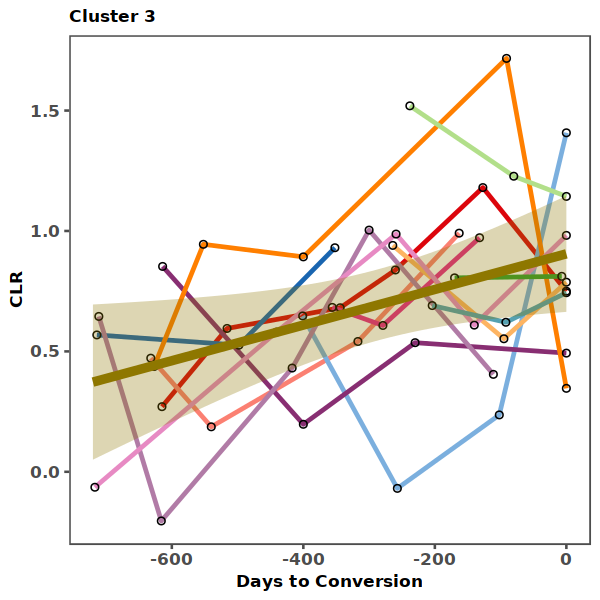

In [29]:
PlotFreqLinePlot1(cluster_data %>% mutate(Sex=subject.biologicalSex), model_fit=model_C3, palette=cluster_colors,
                 fig_path = fig_path,fig_name ="Fig_4D.pdf",
                  x_var = "days_to_conversion", y_var = "clr", color_var = "subject.subjectGuid",
                  shape_var = "Sex", title = "Cluster 3", x_label = "Days to Conversion", 
                  y_label = "CLR", 
                 #annotation_text = "padj=0.030",
                  annotation_x = -600, 
                  annotation_y =1.7, annotation_color = "black")

# Supplementary

## Figure S6 B

In [20]:
## remove cluster 18 
A3_clr_v2_filt <- A3_clr_v2 %>% filter(clusters != "cluster18")

In [21]:
### Updated function for plotting line plot

PlotFreqLinePlot_v2 <- function(frequency_table, model_fit, palette, fig_path = NULL, fig_name = NULL,
                             x_var = "days_to_conversion", y_var = "clr", color_var = "subject.subjectGuid",
                             shape_var = "sex", title = "Cluster 9", x_label = "Days to Conversion", 
                             y_label = "CLR", annotation_text = "padj=", annotation_x = -600, 
                             annotation_y = 1, annotation_color = "red", x_limits = NULL, y_limits = NULL,
                             remove_axis_labels = FALSE) {
    require(ggplot2)
    require(ggeffects)

    # Extract the prediction data frame
    pred.mm <- ggpredict(model_fit, terms = c(x_var))  # Adjusted to use x_var

    # plot
    p1 <- frequency_table %>%
        ggplot() +
        geom_line(aes(x = .data[[x_var]], y = .data[[y_var]], color = .data[[color_var]]), size = 1) + 
        geom_point(aes(x = .data[[x_var]], y = .data[[y_var]], shape = .data[[shape_var]])) + 
        geom_line(data = pred.mm, aes(x = x, y = predicted), color = "#8F7700FF", size = 2) +          
        geom_ribbon(data = pred.mm, aes(x = x, ymin = predicted - 3 * std.error, ymax = predicted + 3 * std.error), 
                    fill = "#8F7700FF", alpha = 0.3) + 
        #annotate(geom = "text", x = annotation_x, y = annotation_y, label = annotation_text, size = 6,
                 #color = annotation_color) +
        labs(title = title) + 
        scale_color_manual(values = palette) + 
        theme_few()+
        theme(
            text = element_text(size = 10, face = "bold"),  
            axis.title = element_text(size = 10, face = "bold"),  
            axis.text = element_text(size = 10, face = "bold"),  
            plot.title = element_text(size = 10, face = "bold"),  
            legend.position = "none",  # Remove all legends
            panel.grid.minor = element_blank(),
            panel.grid.major = element_blank(),
            panel.background = element_blank()
        ) +
        scale_shape_manual(values = c(1, 2))

    # if (remove_axis_labels) {
    #     p1 <- p1 +
    #         theme(axis.title.x = element_blank(),
    #               axis.title.y = element_blank(),
    #               axis.text.x = element_blank(),
    #               axis.text.y = element_text(size = 10, face = "bold"))
    # } else {
    #     p1 <- p1 +
    #         xlab(x_label) +
    #         ylab(y_label)
    # }

    # Adjust the scale of x and y axes if limits are provided
    if (!is.null(x_limits)) {
        p1 <- p1 + scale_x_continuous(limits = x_limits)
    }
    if (!is.null(y_limits)) {
        p1 <- p1 + scale_y_continuous(limits = y_limits)
    }

    # Code to save the plot if fig_path and fig_name are provided
    if (!missing(fig_path) && !missing(fig_name) && nzchar(fig_path) && nzchar(fig_name)) {
        # Construct the full file path with the figure name and desired file extension
        file_name <- paste0(fig_path, "/", fig_name)
        # Use ggsave to save the plot
        ggsave(file_name, plot = p1, width = 4, height = 4, dpi = 300)
    }
    return(p1)
}


In [22]:
clusters <- unique(A3_clr_v2_filt$clusters)
clusters

[1] "cluster2"  "cluster0"  "cluster3"  "cluster12" "cluster1"  "cluster16"
 [7] "cluster14" "cluster11" "cluster8"  "cluster17" "cluster13" "cluster5" 
[13] "cluster9"  "cluster6"  "cluster10" "cluster7"  "cluster4"  "cluster15"

In [23]:
# Remove clusters 3
A3_clr_v2_filt <- A3_clr_v2_filt %>%
  filter(!clusters %in% c('cluster3')) %>% 
  mutate(cluster_num = as.numeric(gsub("cluster", "", clusters))) %>% 
  arrange(cluster_num)


# Define your clusters based on the new numeric column
clusters <- unique(A3_clr_v2_filt$cluster_num)# List to store plots
plot_list <- list()

# Loop through each cluster and generate plots
for (cluster in clusters) {
  # Filter data for the current cluster using the numeric cluster column
  cluster_data_filtered <- A3_clr_v2_filt %>% filter(cluster_num == cluster)
  
  # Fit the linear mixed-effects model
  model_fit <- lmerTest::lmer(clr ~ age_conv + bmi_conv + days_to_conversion + (1 | subject.subjectGuid), data = cluster_data_filtered)
  
  # Determine if axis labels should be removed
  #remove_axis_labels <- ifelse(cluster <= 10, TRUE, FALSE)
  
  # Generate the plot
  p <- PlotFreqLinePlot_v2(
    frequency_table = cluster_data_filtered %>% mutate(Sex = subject.biologicalSex),
    model_fit = model_fit,
    palette = cluster_colors,  # Define or replace with your color palette
    x_var = "days_to_conversion",
    y_var = "clr",
    color_var = "subject.subjectGuid",
    shape_var = "Sex",
    title = paste("Cluster", cluster),
    x_label = "Days to Conversion",
    y_label = "CLR",
    annotation_text = "padj=0.030",
    annotation_x = -600,
    annotation_y = 1.7,
    annotation_color = "black",
    remove_axis_labels = remove_axis_labels
  )
  # Store plot in list with correct indexing
  plot_list[[as.character(cluster)]] <- p
}

boundary (singular) fit: see help('isSingular')



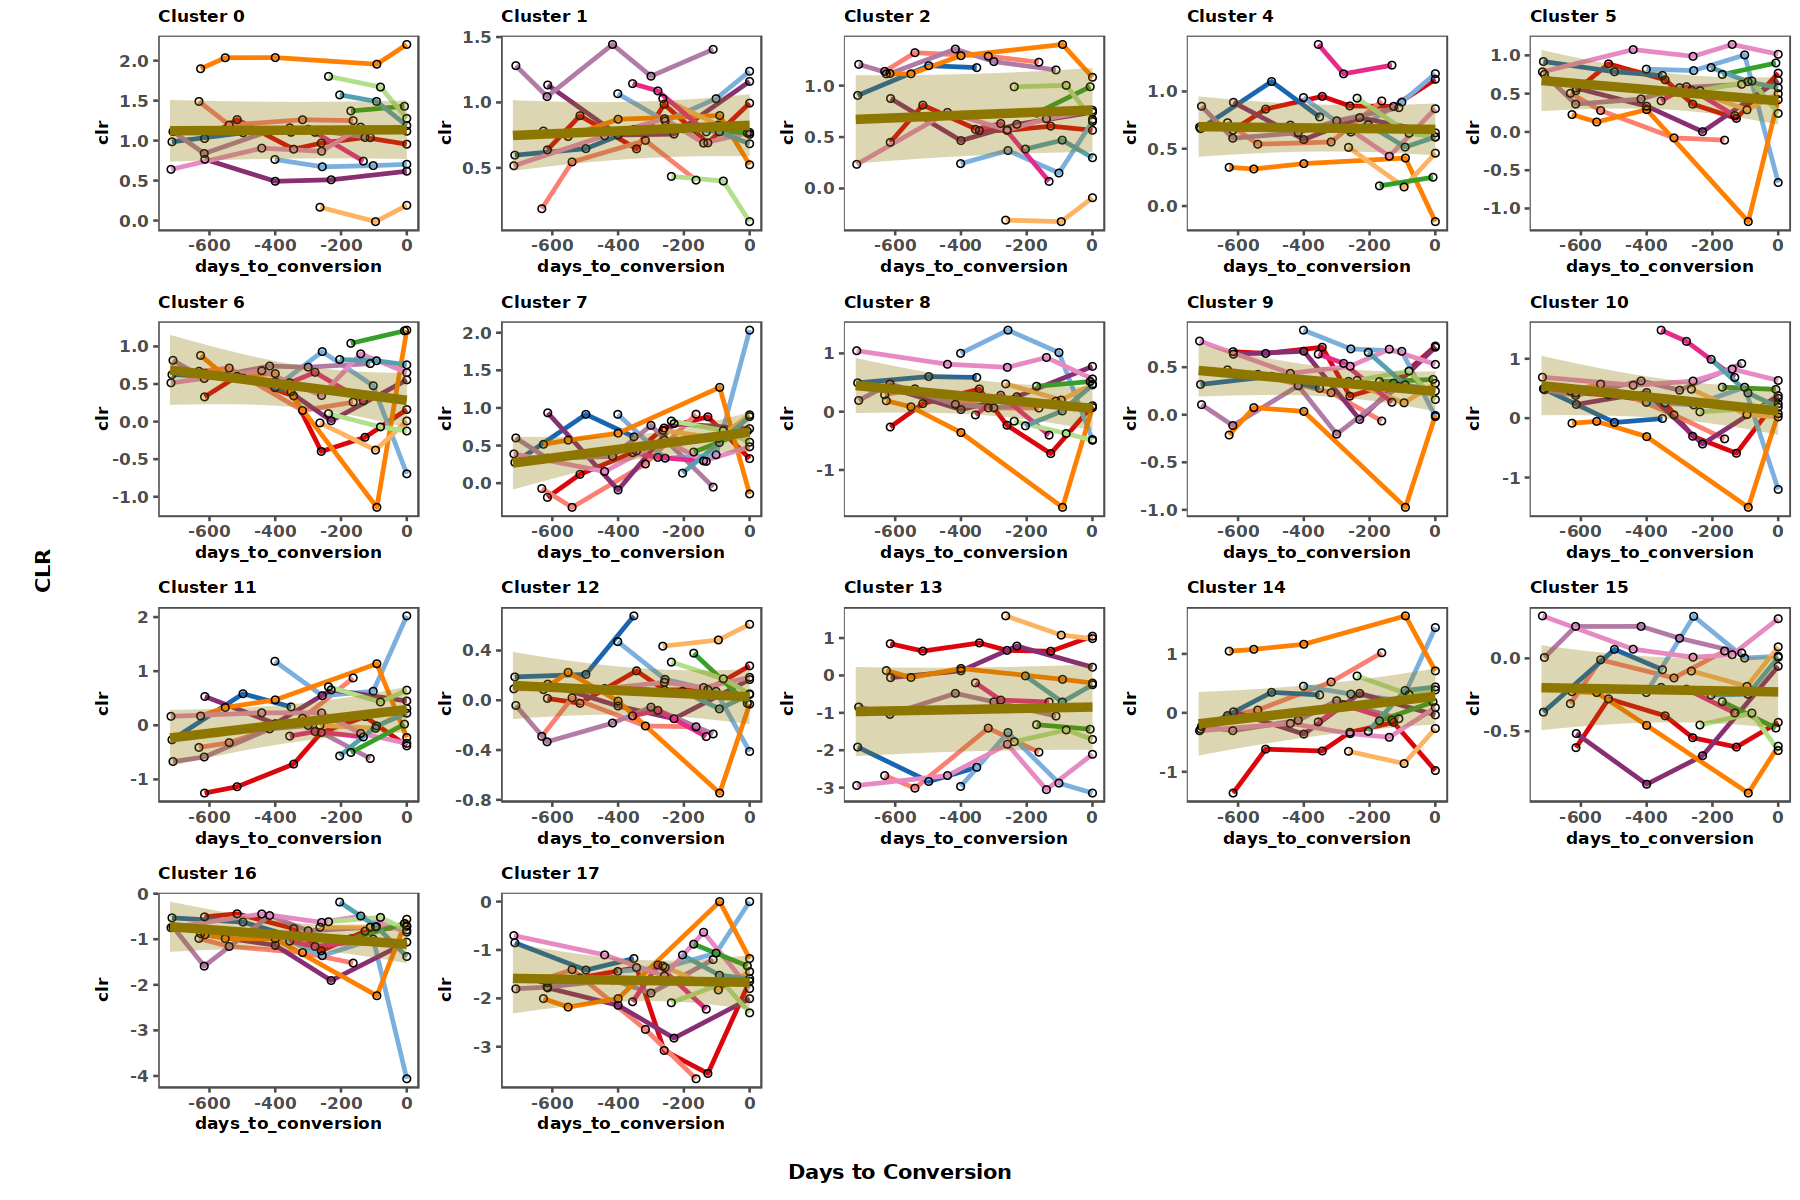

In [24]:
# Arrange plots in a grid
options(repr.plot.width = 15, repr.plot.height = 10)

# Create a plot grid and set common x-axis for each column
ncol <- 5 # Adjust the number of columns as needed
nrow <- ceiling(length(plot_list) / ncol)

# Combine plots
combined_plots <- plot_grid(plotlist = plot_list, ncol = ncol, align = 'v')

# Create a common x-axis label
x_label <- ggdraw() + 
  draw_label("Days to Conversion", size = 12, fontface = 'bold')

# Create a common y-axis label
y_label <- ggdraw() + 
  draw_label("CLR", angle = 90, size = 12, fontface = 'bold')

# Add the common x-axis and y-axis labels
final_plot <- plot_grid(y_label, combined_plots, ncol = 2, rel_widths = c(0.05, 1))
final_plot <- plot_grid(final_plot, x_label, ncol = 1, rel_heights = c(1, 0.05))

# Display the combined plot with the common x-axis and y-axis labels
print(final_plot)

In [25]:
ggsave("/home/jupyter/ALTRA_ANALYSIS/Deep_clean/Figure_files/Certpro_figures/Plots_for_manuscript/
       Fig_S6_B.pdf",plot = final_plot, width =15, height =10, units = "in")


In [26]:
sessionInfo()

R version 4.3.1 (2023-06-16)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.6 LTS

Matrix products: default
BLAS/LAPACK: /home/jupyter/libs/r_scrna/lib/libopenblasp-r0.3.24.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] ggeffects_1.7.0             cowplot_1.1.3              
 [3] GSVA_1.48.3                 ggthemes_5.1.0             
 [5] ggrepel_0.9.5               lme4_1.1-34                
 [7] plotly_4.10.4               knitr_1.47                 
 [9] ggpubr_0.6.0                Seurat